### Recreating non-linear data (red and blue)

In [134]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

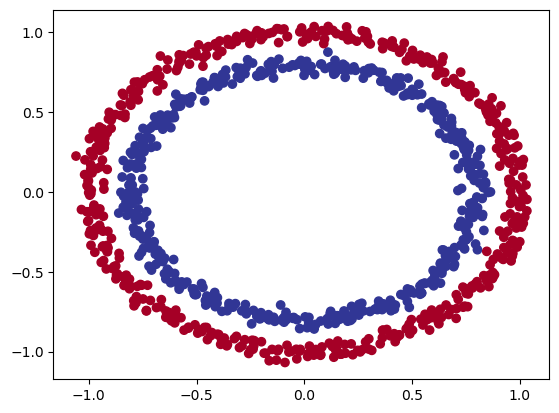

In [135]:
# Make and plot data
from sklearn.datasets import make_circles

noOfSamples = 1000

X, y = make_circles(noOfSamples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [136]:
# Convert data to tensors and then train and testp splits
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.Tensor(X)
y = torch.Tensor(y)

# Split into train and test
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Add train and test datasets to cuda if available
XTrain = XTrain.to(device)
XTest = XTest.to(device)
yTrain = yTrain.to(device)
yTest = yTest.to(device)

### Build a model with non-linear activation functions

In [137]:
# Creating the model
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hiddenLayers = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=1)
        )
    
    def forward(self, x):
        return self.hiddenLayers(x)

# class CircleModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer01 = nn.Linear(in_features=2, out_features=10)
#         self.layer02 = nn.Linear(in_features=10, out_features=10)
#         self.layer03 = nn.Linear(in_features=10, out_features=1)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         return self.layer03(self.relu(self.layer02(self.relu(self.layer01(x)))))


# Creating an instance of the model
circleNonLinear = CircleModel().to(device)
circleNonLinear

CircleModel(
  (hiddenLayers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [138]:
# Define loss function
lossFunction = nn.BCEWithLogitsLoss()

# Define optimizer
optimizer = torch.optim.SGD(params=circleNonLinear.parameters(), lr=0.1)

### Training the model

In [139]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000

for epoch in range(epochs):
    ### Training
    circleNonLinear.train()
    
    # Forward propagation
    logits = circleNonLinear(XTrain).squeeze().to(device)

    # Calculate the loss
    loss = lossFunction(logits, yTrain).to(device)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Update parameters
    optimizer.step()

    ### Testing
    circleNonLinear.eval()

    with torch.inference_mode():
        # Forward propagation
        testLogits = circleNonLinear(XTest).squeeze()

        # Calculate the loss
        testLoss = lossFunction(testLogits, yTest)
    
    # Print results
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Train Loss: {loss}, Test Loss: {testLoss}")


Epoch: 0, Train Loss: 0.6929463148117065, Test Loss: 0.6931881308555603
Epoch: 100, Train Loss: 0.691152811050415, Test Loss: 0.6910240054130554
Epoch: 200, Train Loss: 0.6897744536399841, Test Loss: 0.6893961429595947
Epoch: 300, Train Loss: 0.6879494190216064, Test Loss: 0.6872316002845764
Epoch: 400, Train Loss: 0.6851678490638733, Test Loss: 0.6841148138046265
Epoch: 500, Train Loss: 0.6810224652290344, Test Loss: 0.6794120073318481
Epoch: 600, Train Loss: 0.675148606300354, Test Loss: 0.6728507876396179
Epoch: 700, Train Loss: 0.6665886044502258, Test Loss: 0.6632164120674133
Epoch: 800, Train Loss: 0.6515955328941345, Test Loss: 0.647568941116333
Epoch: 900, Train Loss: 0.6236233115196228, Test Loss: 0.6214525699615479
Epoch: 1000, Train Loss: 0.5681842565536499, Test Loss: 0.5737816691398621
Epoch: 1100, Train Loss: 0.48152956366539, Test Loss: 0.4993472993373871
Epoch: 1200, Train Loss: 0.37056171894073486, Test Loss: 0.40594881772994995
Epoch: 1300, Train Loss: 0.2545759081840

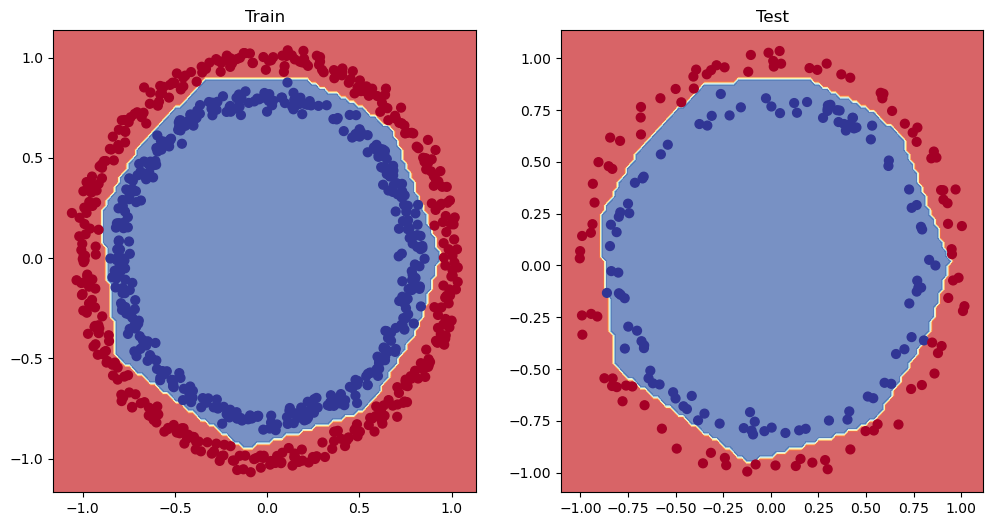

In [140]:
# Plot decision boundary of the model
from Helper_Functions.helper_function import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=circleNonLinear,
                       X=XTrain,
                       y=yTrain)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=circleNonLinear,
                       X=XTest,
                       y=yTest)